## <center>
# <center>CSE473 Computational Intelligence
## <center>Milestone 1
### <center>Team C18:
#### <center>19P6038 Ali Ahmed Ali Ahmed
#### <center>18P8583 Yomna Khalid Hussein Hassan Soltan
#### <center>19P3128 Maha Mohamed Mohamed Roshdy Nabhan



# **IMPORTING NECESSARY FILES**

---



In [ ]:
import tensorflow as tf
from keras import layers
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import time
import matplotlib.pyplot as plt
import numpy as np
import math


# **LOADING DATASET**

---



In [ ]:
# Load and preprocess the MNIST dataset
image_data = tf.keras.datasets.mnist
(train_imgs,train_labels),(test_imgs,test_labels) = image_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **SPLITTING DATA**

---




In [ ]:
num_test_samples = len(test_imgs)
# Calculate the index where to split the data
split_index = int(num_test_samples * 0.5)
# Split the data into test and evaluation sets
test_imgs_split = test_imgs[:split_index]
eval_imgs = test_imgs[split_index:]

test_labels_split = test_labels[:split_index]
eval_labels = test_labels[split_index:]

test_imgs = test_imgs_split
test_labels = test_labels_split
print(len(test_imgs))

5000


#**Data Preprocessing**

---



In [ ]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0
eval_imgs = eval_imgs / 255.0

# **IMPLEMENTING NEURAL NETWORK**

---



In [ ]:
model = tf.keras.Sequential([
    # Flatten Layer
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Dense Layers with Relu Activation Function
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    # Softmax Output Layer
    tf.keras.layers.Dense(10, activation="softmax")
])

# **MODEL CREATION**

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1000, activation="relu"),
        tf.keras.layers.Dense(500, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    return model

#**DEFINING OPTIMIZERS**

---



In [ ]:
#Defining all needed optmizers
S_GD = tf.keras.optimizers.SGD()
GD_M = tf.keras.optimizers.SGD(momentum=0.9)
Ada_grad = tf.keras.optimizers.Adagrad()
Ada_m = tf.keras.optimizers.Adam()

#Grouping optimizers
optimizers = [S_GD, GD_M, Ada_grad, Ada_m]



#**EPOCHS, HYPERPARAMETERS, LISTS FOR HISTORY**

---



In [ ]:
# Define Iterations
epochs = 20

# Define hyperparameters
epochs = 20
batch_size = 64
lr_initial = 5
threshold = 0.01
lr_factor = 0.7

# Define Empty lists for history
Acc_train = []
Loss_Train = []
Acc_eval = []
Loss_eval = []
test_acc = []
test_loss = []

# **TRAINING**

In [ ]:
opt_p =  ['SGD','SGDM','Adagrad','adam']
i=0
for optimizer in optimizers:
    print("----------------------------------------------------------------------------------------------", optimizer)



    # Training Model

    for epoch in range(epochs):

      model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=["accuracy"])
      model.fit(train_imgs, train_labels, epochs=1,batch_size=64)
      start_time = time.time()
        # Evaluate and record statistics
      train_loss, train_acc = model.evaluate(train_imgs, train_labels)
      eval_loss, eval_acc = model.evaluate(eval_imgs, eval_labels)
      Acc_train.append(train_acc)
      Loss_Train.append(train_loss)
      Acc_eval.append(eval_acc)
      Loss_eval.append(eval_loss)


    # Evaluate and record test set statistics
    loss, acc = model.evaluate(test_imgs, test_labels)
    end_time = time.time()
    training_time = end_time - start_time
    # Print the training time
    print(f"Training time for ({opt_p[i]})': {training_time} seconds")
    i=i+1
    test_acc.append(acc)
    test_loss.append(loss)
    # Create the model
    model = create_model()


---------------------------------------------------------------------------------------------- <keras.src.optimizers.sgd.SGD object at 0x7ee8cdee61a0>


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 [==============================] - 1s 4ms/step - loss: 0.1281 - accuracy: 0.9612
Training time for (SGD)': 12.233099699020386 seconds
---------------------------------------------------------------------------------------------- <keras.src.optimizers.sgd.SGD object at 0x7ee8cdee58d0>
157/157 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9772
Training time for (SGDM)': 9.659426212310791 seconds
---------------------------------------------------------------------------------------------- <keras.src.optimizers.adagrad.Adagrad object at 0x7ee8cb052b30>
157/157 [==============================] - 1s 4ms/step - loss: 0.2652 - accuracy: 0.9248
Training time for (Adagrad)': 12.189491033554077 seconds
---------------------------------------------------------------------------------------------- <keras.src.optimizers.adam.Adam object at 0x7ee8cb052770>
157/157 [==============================] - 1s 4ms/step - loss: 0.1765 - accuracy: 0.9740
Training time for 

# **GRADIENT DECSENT WITH ADAPTIVE LEARNING RATE**

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
# Define the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Extract the parameters of the model
par = model.trainable_variables

In [ ]:
# Define the linear search function for adaptive learning rate
def linear_search_lr(model, x_train, y_train, x_val, y_val, lr_initial, threshold, lr_factor):
    lr = lr_initial
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])

    start_time = time.time()

    # Lists to store training history
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    learning_rates = []

    for epoch in range(epochs):
        if (epoch >0):
            last_loss = history.history['loss'][0]
        current_lr = opt.learning_rate.numpy()

        history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1, batch_size=batch_size, verbose=1)

        current_loss = history.history['loss'][0]
        current_acc = history.history['accuracy'][0]
        val_loss = history.history['val_loss'][0]
        val_acc = history.history['val_accuracy'][0]

        # Linear search to find the learning rate
        if (epoch > 0 and abs(current_loss - last_loss)< threshold) and not(current_loss <= 0.001):
            lr *= lr_factor  # Adjust the learning rate (you can use other strategies)
            opt.learning_rate.assign(lr)

        # Print accuracy, loss, and current learning rate
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {current_loss:.4f} - Accuracy: {current_acc:.4f} - Learning Rate: {lr:.6f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_acc:.4f}")

        # Append values to lists
        train_losses.append(current_loss)
        train_accuracies.append(current_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        learning_rates.append(current_lr)

    end_time = time.time()
    training_time = end_time - start_time

    # Return training time
    return training_time, train_losses, train_accuracies, val_losses, val_accuracies

In [ ]:
# Split the training data into training and validation sets
val_split = 0.2
val_size = int(val_split * len(train_images))
x_val, y_val = train_images[:val_size], train_labels[:val_size]
x_train, y_train = train_images[val_size:], train_labels[val_size:]

# Train the model using Gradient Descent with Adaptive Learning Rate
training_time_c, train_losses, train_accuracies, val_losses, val_accuracies = linear_search_lr(model, x_train, y_train, x_val, y_val, lr_initial, threshold, lr_factor)

# Print the training time
print(f"Training time for Gradient Descent with Adaptive Learning Rate: {training_time_c} seconds")

750/750 [==============================] - 11s 14ms/step - loss: 0.0138 - accuracy: 0.9069 - val_loss: 0.0058 - val_accuracy: 0.9622
Epoch 1/20 - Loss: 0.0138 - Accuracy: 0.9069 - Learning Rate: 5.000000 - Val Loss: 0.0058 - Val Accuracy: 0.9622
750/750 [==============================] - 10s 14ms/step - loss: 0.0054 - accuracy: 0.9655 - val_loss: 0.0047 - val_accuracy: 0.9696
Epoch 2/20 - Loss: 0.0054 - Accuracy: 0.9655 - Learning Rate: 3.500000 - Val Loss: 0.0047 - Val Accuracy: 0.9696
750/750 [==============================] - 10s 14ms/step - loss: 0.0032 - accuracy: 0.9803 - val_loss: 0.0040 - val_accuracy: 0.9738
Epoch 3/20 - Loss: 0.0032 - Accuracy: 0.9803 - Learning Rate: 2.450000 - Val Loss: 0.0040 - Val Accuracy: 0.9738
750/750 [==============================] - 10s 13ms/step - loss: 0.0022 - accuracy: 0.9873 - val_loss: 0.0034 - val_accuracy: 0.9782
Epoch 4/20 - Loss: 0.0022 - Accuracy: 0.9873 - Learning Rate: 1.715000 - Val Loss: 0.0034 - Val Accuracy: 0.9782
750/750 [=======

# **GRAPHING & COMPARING**

---





**GRAPHS**

---


80


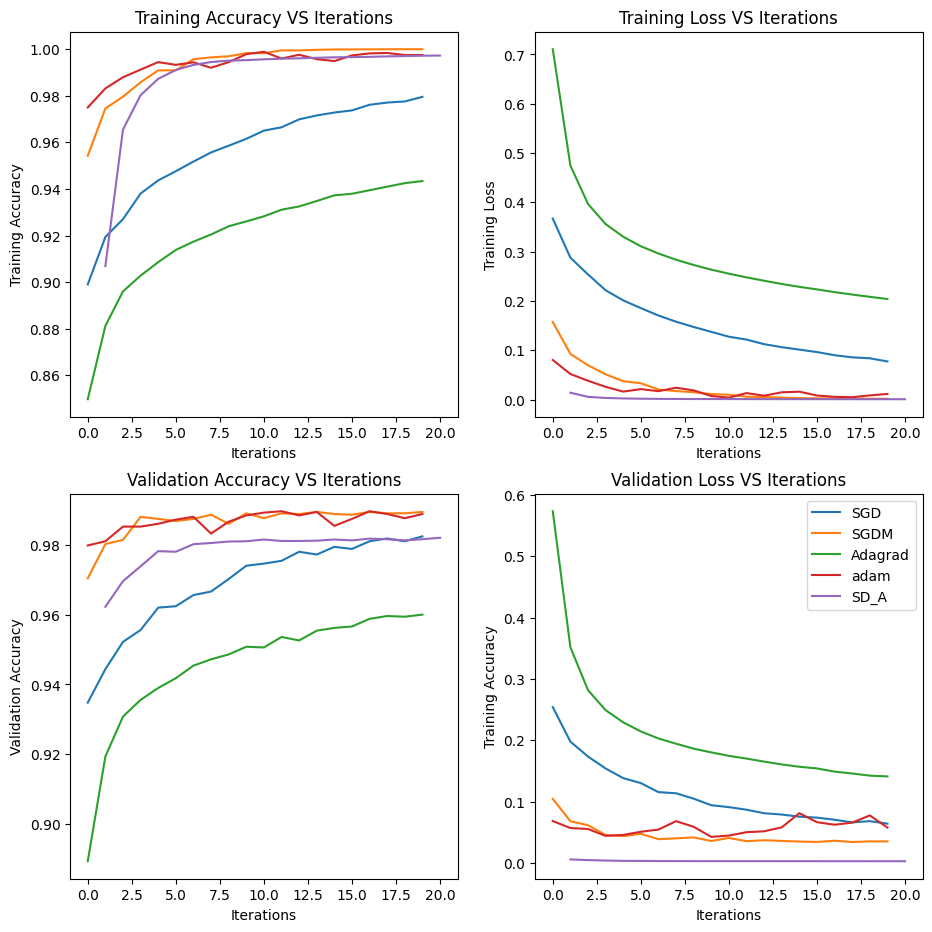

In [ ]:
step_size = 20
start = 0
end = step_size
print(len(Acc_train))
opt_leg =  ['SGD','SGDM','Adagrad','adam', 'SD_A']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 11))

while start < len(Acc_train):
  axes[0, 0].plot(Acc_train[start:end],label=opt_leg[start // step_size])
  axes[0, 0].set_title('Training Accuracy VS Iterations')
  axes[0, 0].set_ylabel('Training Accuracy')
  axes[0, 1].plot(Loss_Train[start:end],label=opt_leg[start // step_size])
  axes[0, 1].set_title('Training Loss VS Iterations')
  axes[0, 1].set_ylabel('Training Loss')
  axes[1, 0].plot(Acc_eval[start:end],label=opt_leg[start // step_size])
  axes[1, 0].set_title('Validation Accuracy VS Iterations')
  axes[1, 0].set_ylabel('Validation Accuracy')
  axes[1, 1].plot(Loss_eval[start:end],label=opt_leg[start // step_size])
  axes[1, 1].set_title('Validation Loss VS Iterations')
  axes[1, 1].set_ylabel('Validation Loss')

  end += step_size
  start += step_size

axes[0,0].plot(range(1, epochs + 1), train_accuracies, label='SD_A')
axes[0,1].plot(range(1, epochs + 1), train_losses, label='SD_A')
axes[1,0].plot(range(1, epochs + 1), val_accuracies, label='SD_A')
axes[1,1].plot(range(1, epochs + 1), val_losses, label='SD_A')


for row in axes:
    for ax in row:
        ax.set_xlabel('Iterations')
        plt.legend()
plt.ylabel('Training Accuracy')
plt.show()


 **BARCHARTS**

---



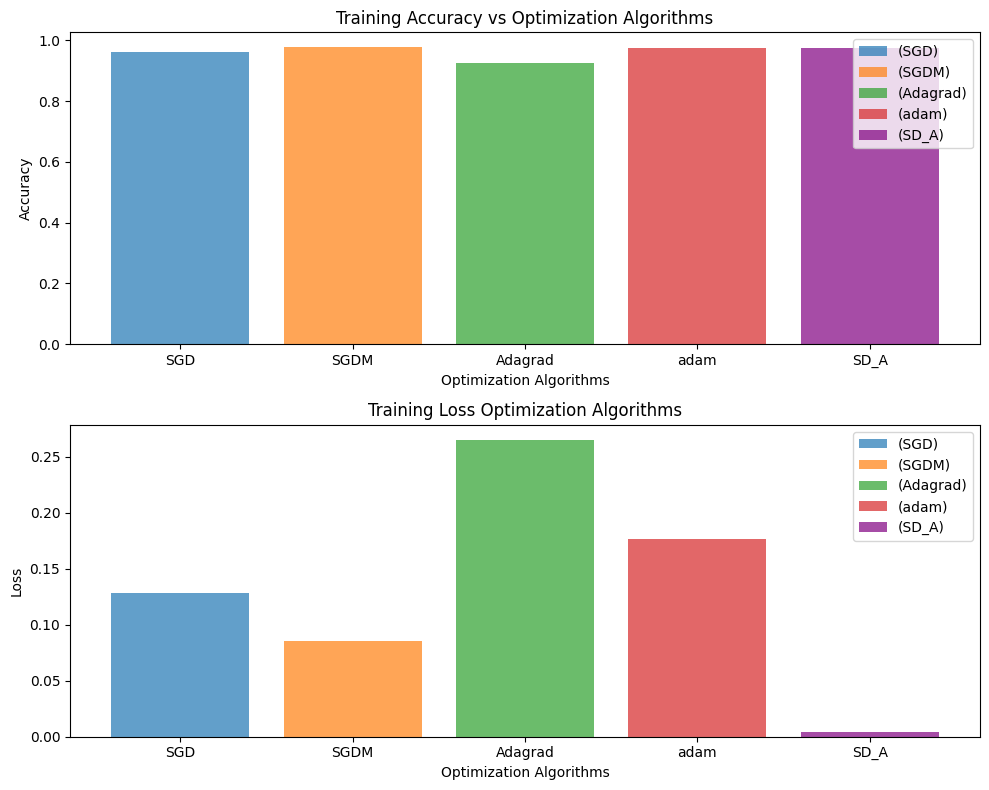

In [ ]:
opt =  ['SGD','SGDM','Adagrad','adam','SD_A']

# Create a 2x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Create bar charts for training accuracy and evaluation accuracy
for i in range(4):
    axes[0].bar(i,test_acc[i], label=f'({opt[i]})', alpha=0.7)

axes[0].bar(4, np.mean(val_accuracies[2]), label=f'(SD_A)', alpha=0.7, color='purple')  # Change 2.5 to the appropriate position
SD_A_index = opt.index('SD_A')

axes[0].set_title('Training Accuracy vs Optimization Algorithms')
axes[0].set_xlabel('Optimization Algorithms')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels(opt)
axes[0].legend()

for i in range(4):
    axes[1].bar(i, test_loss[i], label=f'({opt[i]})', alpha=0.7)
axes[1].bar(4, np.mean(val_losses[2]), label=f'(SD_A)', alpha=0.7, color='purple')  # Change 2.5 to the appropriate position

axes[1].set_title('Training Loss Optimization Algorithms')
axes[1].set_xlabel('Optimization Algorithms')
axes[1].set_ylabel('Loss')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels(opt)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the subplots
plt.show()